In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

In [0]:
#!pip install --upgrade tables
#!pip install eli5

In [8]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


## Wczytywanie danych

In [9]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [10]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

## Dummy Model

In [11]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [17]:
feats = ['car_id']
X = df[feats].values
y = df['price_value'].values

model = DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)

mae(y, y_pred)

39465.934630440985

In [18]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [22]:
df['price_currency'].value_counts()

PLN    106290
Name: price_currency, dtype: int64

In [21]:
df = df[df['price_currency'] != 'EUR'] 
df.shape

(106290, 155)

##Features

In [24]:
for feat in df.columns:
  print(feat)

breadcrumb
created_at
price_currency
price_details
price_value
seller_address
seller_name
seller_type
feature_czujniki-parkowania-przednie
feature_poduszka-powietrzna-chroniąca-kolana
feature_kurtyny-powietrzne
feature_klimatyzacja-dwustrefowa
feature_światła-led
feature_czujnik-zmierzchu
feature_elektrycznie-ustawiane-lusterka
feature_asr-(kontrola-trakcji)
feature_poduszka-powietrzna-kierowcy
feature_cd
feature_elektryczne-szyby-przednie
feature_poduszka-powietrzna-pasażera
feature_system-start-stop
feature_światła-do-jazdy-dziennej
feature_komputer-pokładowy
feature_elektryczne-szyby-tylne
feature_klimatyzacja-manualna
feature_tapicerka-welurowa
feature_czujnik-deszczu
feature_światła-przeciwmgielne
feature_ogrzewanie-postojowe
feature_radio-niefabryczne
feature_regulowane-zawieszenie
feature_ogranicznik-prędkości
feature_zmieniarka-cd
feature_szyberdach
feature_isofix
feature_asystent-pasa-ruchu
feature_alufelgi
feature_bluetooth
feature_nawigacja-gps
feature_asystent-parkowania
fe

In [29]:
df['param_color'].factorize()[0]

array([-1, -1, -1, ..., -1, -1, -1])

In [0]:
SUFIX_CAT = '__cat'
for feat in df.columns:
  if isinstance(df[feat][0], list): continue

  factorized_values = df[feat].factorize()[0]
  if SUFIX_CAT in feat:
    df[feat] = factorized_values
  else:
    df[feat + SUFIX_CAT] = factorized_values

In [42]:
cat_feats = [x for x in df.columns if SUFIX_CAT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]
len(cat_feats)

151

In [43]:
X = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, cv=3, scoring = 'neg_mean_absolute_error')
np.mean(scores)

-19566.588937368324

In [45]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(X,y)

imp = PermutationImportance(m, random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.2533 ± 0.0040,param_napęd__cat
0.2008 ± 0.0047,param_faktura-vat__cat
0.1943 ± 0.0088,param_stan__cat
0.1423 ± 0.0086,param_rok-produkcji__cat
0.0629 ± 0.0047,param_moc__cat
0.0424 ± 0.0014,feature_kamera-cofania__cat
0.0412 ± 0.0008,param_skrzynia-biegów__cat
0.0286 ± 0.0037,param_marka-pojazdu__cat
0.0191 ± 0.0022,param_pojemność-skokowa__cat
0.0163 ± 0.0005,feature_bluetooth__cat


In [0]:
def group_and_barplot(feat_groupby, feat_agg = 'price_value', agg_funcs = [np.mean, np.median, np.size], feat_sort = 'size', top=50, subplots=True):

  return (
  df
  .groupby(feat_groupby)[feat_agg]
  .agg(agg_funcs)
  .sort_values(feat_sort, ascending = False)
  .head(top)
  ).plot(kind='bar', figsize=(15,5), subplots = subplots)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b771a3198>,
      dtype=object)

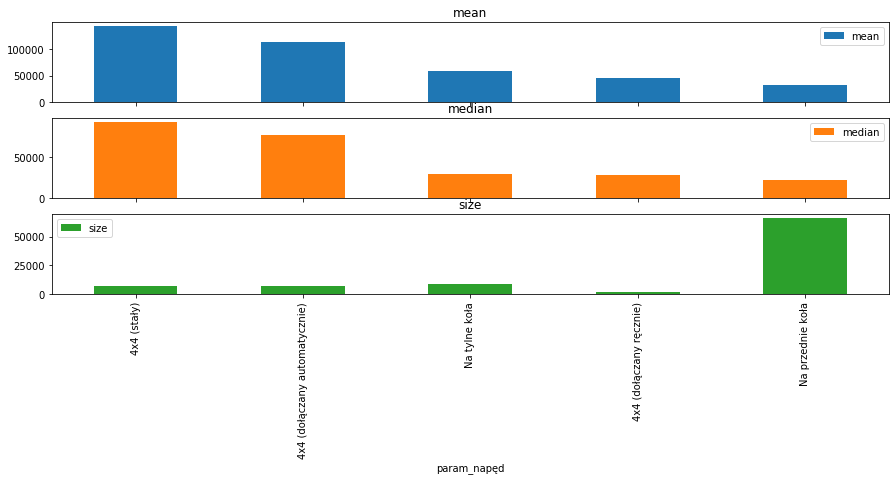

In [53]:
group_and_barplot('param_napęd', feat_sort='mean')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b77317d30>,
      dtype=object)

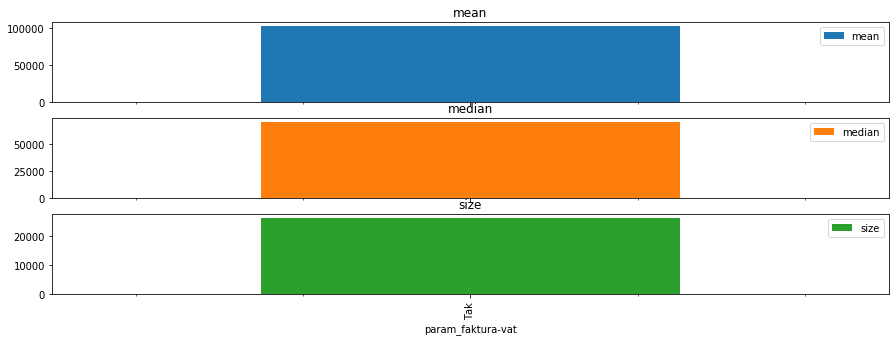

In [54]:
group_and_barplot('param_faktura-vat')

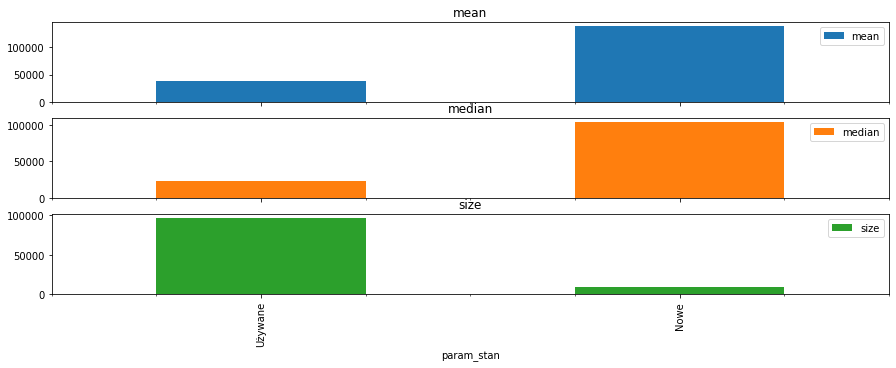

In [55]:
group_and_barplot('param_stan');

In [0]:
!git add day3_simple_model.ipynb

In [60]:
!git commit -m 'simple model'

[master 1a819ab] simple model
 1 file changed, 1 insertion(+)
 create mode 100644 day3_simple_model.ipynb


In [61]:
!git push -u origin master

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 42.62 KiB | 7.10 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/oliwial/dw_matrix_car.git
   5337e2b..1a819ab  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
